In [1]:
import numpy as np
import qnm_filter
import qnm
import random
import argparse
from scipy.special import logsumexp
from pathlib import Path
import matplotlib.pyplot as pl
import glob
from gwpy.timeseries import TimeSeries
import h5py
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (15, 12),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'legend.numpoints' : 1,
    'axes.grid' : True,
    'grid.alpha' : 0.9,
}
matplotlib.rcParams.update(mplparams)

red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'
color_arr = [red, blue, green, yellow, purple, orange]

In [4]:
snr, credibility = np.loadtxt("results/credibility_toy_model_220+200_0.dat").T

Text(0.5, 1.0, 'pp plot: \\{220,200\\}')

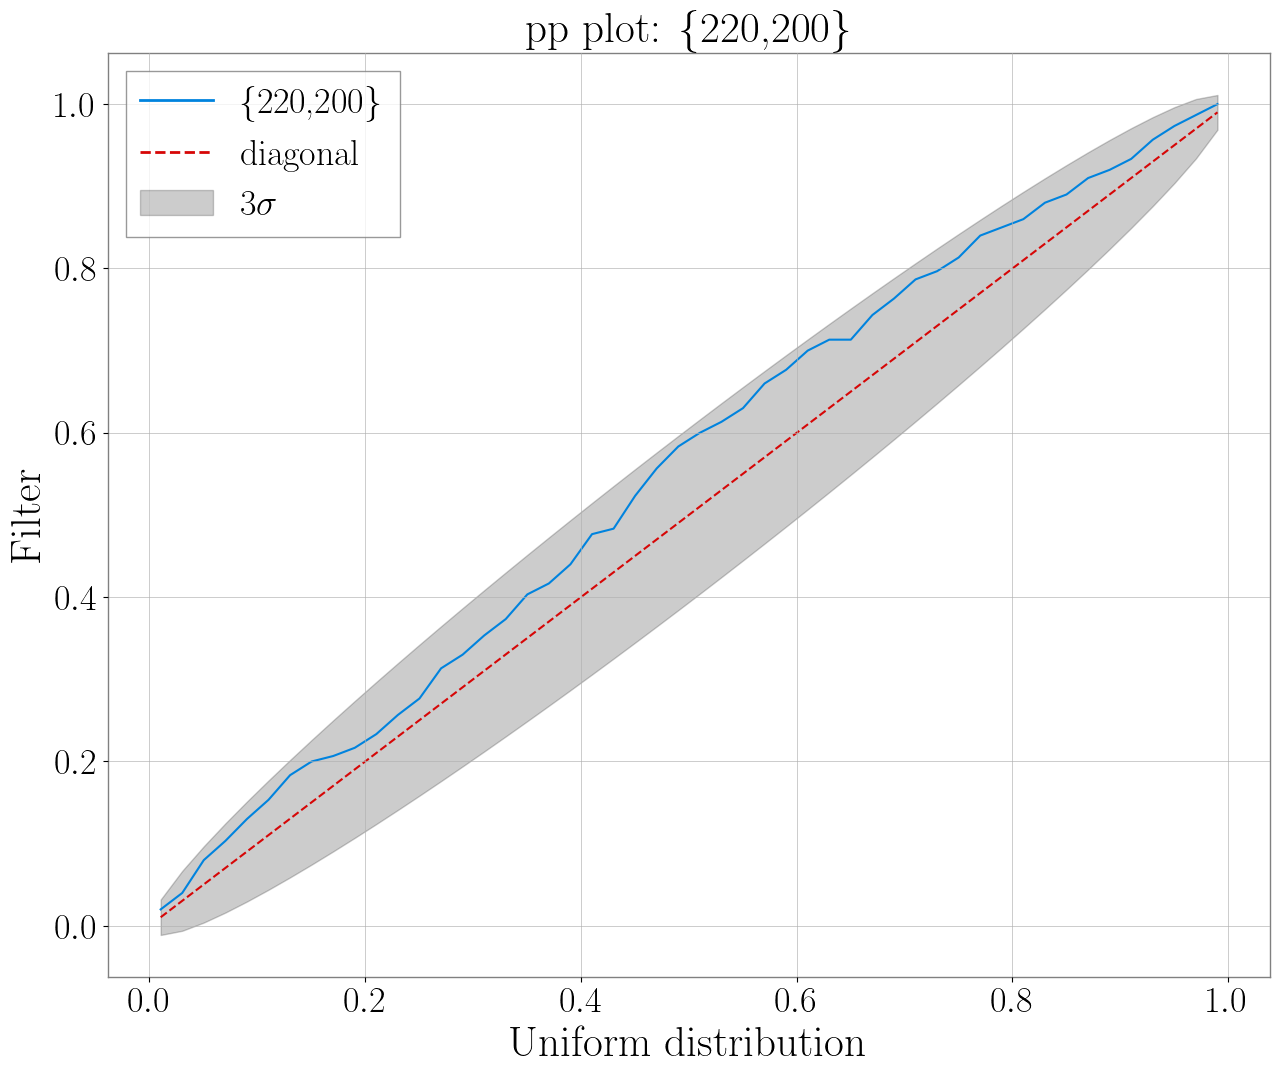

In [29]:
snr, credibility = np.loadtxt("results/credibility_toy_model_220+200_0.dat").T
counts, bin_edges = np.histogram(credibility, bins=50, density=True)

# Compute cumulative sum
cdf = np.cumsum(counts)  # Cumulative sum
cdf /= cdf[-1]  # Normalize to get a valid CDF (max value = 1)

# Compute bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the CDF
pl.plot(bin_centers, cdf, c=blue, label="\{220,200\}")  # Line plot
pl.plot(bin_centers, bin_centers, c=red, ls = '--', label='diagonal')

std =  np.sqrt(bin_centers * (1 - bin_centers)) / np.sqrt(200)
pl.fill_between(bin_centers, bin_centers - 3*std, bin_centers + 3*std, alpha=0.2, color = 'k', label='3$\sigma$')


# Labels and title
leg = pl.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)
pl.xlabel("Uniform distribution")
pl.ylabel("Filter")
pl.title("pp plot: \{220,200\}")